In [3]:
import math
import os
import random
from pathlib import Path
from collections import defaultdict
from itertools import product

from graphviz import Digraph

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pydotplus
from dmba import plotDecisionTree, textDecisionTree

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

In [4]:
DATA = Path('.').resolve().parents[1] / 'capstone/project_submission'
raw_df_path = DATA / 'train_data.csv'
raw_df = pd.read_csv(raw_df_path)
criteria_col = (raw_df.isna().sum())/raw_df.shape[0] <= 0
df = raw_df[criteria_col.index[criteria_col]]
df = df[(df.isnull().sum(axis = 1))/df.shape[1] <= 0]
df['status'] = [1 if i == 'Charged Off' else 0 for i in df['loan_status']]
df.drop(columns = 'loan_status',inplace = True) # 69 col
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] >= 0.7)]
df.drop(df[to_drop],axis = 1,inplace = True)
df.drop(columns = ['out_prncp','recoveries'],
        inplace = True)
df.drop(columns = ['issue_d','verification_status','pymnt_plan','earliest_cr_line','last_credit_pull_d',
                   'hardship_flag',
                   'sub_grade','addr_state','policy_code'],
        inplace = True)

/var/folders/59/qnw1s_ws12900d7g8gbc8wmc0000gn/T/ipykernel_8470/3104340493.py:3: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(raw_df_path)


In [16]:
df.shape

(1827125, 38)

In [24]:
#df.dtypes

In [5]:
X = pd.get_dummies(df.loc[:,df.columns != 'status'],drop_first=True)
y = df['status']

In [2]:
X.shape

NameError: name 'X' is not defined

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#X.corr()

# logistic

In [22]:
import statsmodels.api as sm
log_mod = sm.GLM(y,sm.add_constant(X),family = sm.families.Binomial())
log_result = log_mod.fit()
log_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:              1827125
Model:                            GLM   Df Residuals:                  1827067
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1954e+05
Date:                Thu, 28 Jul 2022   Deviance:                   6.3908e+05
Time:                        13:21:11   Pearson chi2:                 3.39e+16
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1591
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7063      0.229    -11.830      0.000      -3.155      -2.258
loan_amnt                      9.947e-05   5.96e-07    166.970      0.000    9.83e-05       0.000
int_rate                         -0.2447      0.002   -109.817      0.000      -0.249      -0.240
annual_inc                    -3.854e-06   1.06e-07    -36.419      0.000   -4.06e-06   -3.65e-06
delinq_2yrs                       0.0811      0.005     16.994      0.000       0.072       0.090
open_acc                         -0.0111      0.001    -12.169      0.000      -0.013      -0.009
pub_rec                           0.3169      0.014     21.859      0.000       0.288       0.345
revol_bal                      2.511e-06    2.2e-07     11.427      0.000    2.08e-06    2.94e-06
total_pymnt                      -0.0001   1.04e-06   -112.153      0.000      -0.000      -0.000
total_rec_int                  1.766e-05   3.01e-06      5.865      0.000    1.18e-05    2.36e-05
total_rec_late_fee                0.0201      0.000     77.139      0.000       0.020       0.021
last_pymnt_amnt                  -0.0011    1.1e-05    -98.345      0.000      -0.001      -0.001
collections_12_mths_ex_med       -0.0019      0.020     -0.097      0.923      -0.041       0.037
acc_now_delinq                    0.3395      0.041      8.288      0.000       0.259       0.420
tot_coll_amt                   3.839e-07   8.89e-07      0.432      0.666   -1.36e-06    2.13e-06
tot_cur_bal                   -8.506e-07      4e-08    -21.248      0.000   -9.29e-07   -7.72e-07
acc_open_past_24mths              0.0618      0.001     47.658      0.000       0.059       0.064
chargeoff_within_12_mths          0.0015      0.031      0.048      0.962      -0.058       0.061
delinq_amnt                    1.045e-05   3.65e-06      2.866      0.004     3.3e-06    1.76e-05
mo_sin_old_rev_tl_op             -0.0001   3.79e-05     -3.093      0.002      -0.000    -4.3e-05
mo_sin_rcnt_rev_tl_op            -0.0033      0.000    -11.463      0.000      -0.004      -0.003
mo_sin_rcnt_tl                   -0.0066      0.001    -11.359      0.000      -0.008      -0.005
mort_acc                          0.0884      0.002     36.316      0.000       0.084       0.093
num_accts_ever_120_pd            -0.0273      0.003    -10.465      0.000      -0.032      -0.022
num_actv_bc_tl                    0.0186      0.002     10.049      0.000       0.015       0.022
num_il_tl                         0.0090      0.001     15.624      0.000       0.008       0.010
num_tl_90g_dpd_24m               -0.0272      0.008     -3.262      0.001      -0.044      -0.011
pub_rec_bankruptcies             -0.2150      0.017    -12.900      0.000      -0.248      -0.182
tax_liens                        -0.2018     

**note that tot_coll_amt is among RF's important variables, yet the p-value is much larger than 0.05 here. Therefore we exclude it from the var_list_name**

Few of the limitations of Random forest are :

- Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
- Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ). [ The lower the cardinality, the more duplicated elements in a column.
]

In [9]:
X['tot_coll_amt'].value_counts()

0.0        1548464
50.0          3242
100.0         2733
75.0          2038
150.0         1589
            ...   
22995.0          1
80646.0          1
27414.0          1
22773.0          1
7921.0           1
Name: tot_coll_amt, Length: 14535, dtype: int64

**tot_coll_amt has 1548464 being 0, indicating high cardinality. that's probably why it is selected in rf**

# RF

In [25]:
rf_all = RandomForestClassifier(random_state = 1)
rf_all.fit(X,y)
importance = pd.DataFrame({'feature':X.columns,'var_importance':rf_all.feature_importances_})
importance = importance.sort_values('var_importance',ascending=False)
var_list = importance[importance['var_importance'] > 0.005]
var_list_name = var_list['feature'].tolist()
var_list_name.remove('debt_settlement_flag_Y')
var_list_name.remove('tot_coll_amt')


In [28]:
var_list_name

['int_rate',
 'total_pymnt',
 'last_pymnt_amnt',
 'total_rec_int',
 'loan_amnt',
 'revol_bal',
 'tot_cur_bal',
 'mo_sin_old_rev_tl_op',
 'total_bal_ex_mort',
 'annual_inc',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'open_acc',
 'total_rec_late_fee',
 'mo_sin_rcnt_tl',
 'acc_open_past_24mths',
 'num_actv_bc_tl',
 'mort_acc',
 'initial_list_status_w',
 'num_accts_ever_120_pd',
 'term_ 60 months',
 'delinq_2yrs',
 'grade_E',
 'grade_D',
 'pub_rec',
 'grade_F',
 'purpose_debt_consolidation']

*** note xgboost also has feature importance ranking. https://mljar.com/blog/feature-importance-xgboost/***

# lasso

In [7]:
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV


In [8]:
logit_reg = LogisticRegression(penalty='l1', C=1e42, solver='saga')
logit_reg.fit(X, y)

/Users/ashley/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1e+42, penalty='l1', solver='saga')

<AxesSubplot:>

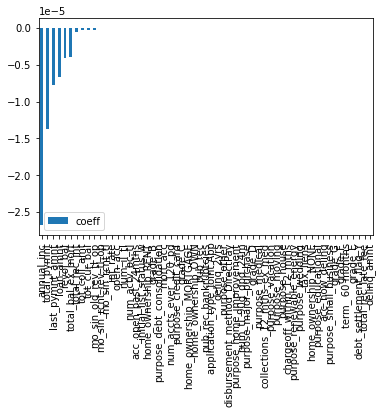

In [27]:
pd.sort_values('coeff',inplace = True)
pd.plot.bar()

In [28]:
# pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
#              index=X.columns)
pd.head(10)

,coeff
annual_inc,-2.681528e-05
total_pymnt,-1.370895e-05
last_pymnt_amnt,-7.705470e-06
loan_amnt,-6.718616e-06
revol_bal,-4.065737e-06
total_bal_ex_mort,-3.905216e-06
total_rec_int,-4.916311e-07
tot_coll_amt,-3.168706e-07
tot_cur_bal,-2.687971e-07
mo_sin_old_rev_tl_op,-2.212038e-07


All included in rf

In [29]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV


## LASSOCV for binary class label does not work, use logistc regression with l1 penalty

In [10]:
# lasso = LassoCV(normalize=True, tol=1e-2,max_iter=4000) ## Create a list of alphas to cross-validate against
# las_mod = lasso.fit(X,y)

# fit to default XGBoost, see train&test error

In [39]:
df_clean = X[var_list_name] # X
y = df['status'] # y
train_x,test_x,train_y,test_y = train_test_split(df_clean,y,test_size=0.2)
xgb_default = XGBClassifier(objective = 'binary:logistic')
xgb_default.fit(train_x,train_y)
pred_default_train = xgb_default.predict_proba(train_x)[:,1]
pred_default_test = xgb_default.predict_proba(test_x)[:,1]
pred_default_train_actual = xgb_default.predict(train_x)
pred_default_test_actual = xgb_default.predict(test_x)
print(np.mean(pred_default_train_actual != train_y))
print(np.mean(pred_default_test_actual != test_y))

0.02624957241568037
0.027611685024286788


# fit to refined XGBoost model

In [61]:
df_clean = X[var_list_name] # X
y = df['status'] # y
train_x,test_x,train_y,test_y = train_test_split(df_clean,y,test_size=0.2)
xgb_default = XGBClassifier(objective = 'binary:logistic', n_estimators=450, max_depth=6,
                             learning_rate=0.1)
xgb_default.fit(train_x,train_y)
pred_default_train = xgb_default.predict_proba(train_x)[:,1]
pred_default_test = xgb_default.predict_proba(test_x)[:,1]
pred_default_train_actual = xgb_default.predict(train_x)
pred_default_test_actual = xgb_default.predict(test_x)
print(np.mean(pred_default_train_actual != train_y))
print(np.mean(pred_default_test_actual != test_y))

0.02162824108914278
0.023651912157077376


# best

In [62]:
df_clean = X[var_list_name] # X
y = df['status'] # y
train_x,test_x,train_y,test_y = train_test_split(df_clean,y,test_size=0.2)
xgb_default = XGBClassifier(objective = 'binary:logistic', n_estimators=550, max_depth=8,
                             learning_rate=0.1)
xgb_default.fit(train_x,train_y)
pred_default_train = xgb_default.predict_proba(train_x)[:,1]
pred_default_test = xgb_default.predict_proba(test_x)[:,1]
pred_default_train_actual = xgb_default.predict(train_x)
pred_default_test_actual = xgb_default.predict(test_x)
print(np.mean(pred_default_train_actual != train_y))
print(np.mean(pred_default_test_actual != test_y))

0.011401108298556475
0.015319148936170212


# making test into the correct shape

In [40]:
test_data_given = pd.read_csv('updated_test_data_20200728.csv')
drop_2 = criteria_col[criteria_col.values == False].index.tolist()
to_drop_test = to_drop +drop_2+['index','out_prncp','recoveries','issue_d','verification_status','pymnt_plan','earliest_cr_line','last_credit_pull_d',
                   'hardship_flag',
                   'sub_grade','addr_state','policy_code']
test_data_given.drop(test_data_given[to_drop_test],axis = 1,inplace = True)
X2 = pd.get_dummies(test_data_given.loc[:,test_data_given.columns != 'status'],drop_first=True)
X_final = X2[var_list_name]


In [43]:
for i in df_clean.columns:
    if i not in X_final.columns:
        print(i)

In [44]:
df_clean.shape

(1827125, 27)

In [42]:
X_final.shape

(211627, 27)

# fit default

In [73]:
xgb_default

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=550,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
#xgb_default = XGBClassifier(objective = 'binary:logistic')
xgb_default.fit(df_clean,y)
pred_submit = xgb_default.predict(X_final)
np.unique(pred_submit,return_counts = True) # charged-off rate = 7.6%

(array([0, 1]), array([191699,  19928]))

In [71]:
submit = pd.DataFrame(pred_submit,columns = ['prediction_score'])
submit.reset_index(inplace = True)
submission = submit.to_csv('refined_xgb_mod.csv')

## the parameter can be used for up/down sampling: scale_pos_weight [default=1]

Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)

# tune model: k fold where k = 2 to slow tho

***subsample, n_estimators, max_depth, reg_lambda, learning rate, colsample_bytree***

train learning rate(eta) and max_depth first

In [58]:
# idx = np.random.choice(range(2),size = len(X),replace = True)
# error = []
# for eta,max_dep in product([0.1, 0.5, 0.9],[3, 6, 9]):
#     xgb = XGBClassifier(objective = 'binary:logistic',learning_rate = eta, max_depth = max_dep,n_estimators=100)
#     cv_error = []
#     for k in range(2):
#         fold_idx = idx == k
#         train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
#         test_X = X.loc[fold_idx]; test_y = y[fold_idx]
        
#         xgb.fit(train_X,train_y)
#         pred = xgb.predict_proba(test_X)[:,1]
#         cv_error.append(np.mean(abs(test_y - pred) > 0.5))
#     error.append({'eta':eta,'max_dep':max_dep,'avg_error':np.mean(cv_error)})
#     print(error[-1])
# errors = pd.DataFrame(error)
# errors

# tune predict ntree_limit

In [67]:
results = []
for ntree_limit in range(1, 250):
    train_default = xgb_default.predict_proba(train_x, ntree_limit=ntree_limit)[:, 1]
    #train_penalty = xgb_penalty.predict_proba(train_x, ntree_limit=ntree_limit)[:, 1]
    pred_default = xgb_default.predict_proba(test_x, ntree_limit=ntree_limit)[:, 1]
    #pred_penalty = xgb_penalty.predict_proba(test_X, ntree_limit=ntree_limit)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        #'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(test_y - pred_default) > 0.5),
        #'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  default test
0           1       0.064984      0.064941
1           2       0.064537      0.064413
2           3       0.064449      0.064303
3           4       0.064298      0.064101
4           5       0.063859      0.063668


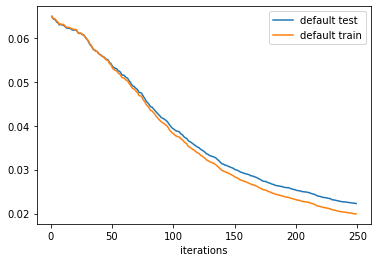

In [69]:
ax = results.plot(x='iterations', y='default test')
#results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
#results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

In [63]:
xgb_default.predict(X_final,ntree_limit = 2)

/Users/ashley/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])